## Introduction

The TrAItor has attemped to break into the model and steal our sensitive information. But, you've intercepted an audio recording of the TrAItor typing their password. Can you decipher the password using only the keystroke sounds?

## Objective

Analyze the audio recordings to determine the exact password. Use audio analysis and pattern recognition to extract the password from the key press sounds. Submit the correct password to complete the challenge.

**NOTE** Rate Limit requirements.

Please limit endpoint requests to 1 request per second per user. Any excessive requests may result in disqualification from the competition.

## Setup

In order to interact with the challenge, you will need your API Key.

You can find this key in the Crucible platform in this challenge.

[https://crucible.dreadnode.io/challenges/sonotype](https://crucible.dreadnode.io/challenges/sonotype)

In [11]:
CRUCIBLE_API_KEY = "YOUR_API_KEY"  # Replace with your actual API key
with open('../api.txt', 'r') as f:
    CRUCIBLE_API_KEY = f.readline()

### Install Required Packages

Install the required packages.


In [ ]:
%pip install requests
%pip install numpy
%pip install matplotlib

### Set Notebook Variables

Set the variables used throughout the notebook


In [12]:
import glob
CHALLENGE = "sonotype"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://sonotype.crucible.dreadnode.io"

keystroke_files = glob.glob('./recordings/keystrokes/keystroke_*.wav')
password_attempt_files = glob.glob('./recordings/passwords/password_attempt_*.wav')
ARTIFACT_FILES = keystroke_files
# ARTIFACT_FILES = ['./recordings/passwords/password_attempt_1.wav']

In [13]:
print(len(keystroke_files))

42


### Download Data

Before diving into data analysis, you'll need to download the necessary dataset for this challenge.

## Submit Your Findings

Submit findings placeholder

In [9]:
import requests


def query(input_data):
    response = requests.post(
        f"{CHALLENGE_URL}/score",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={"data": input_data},
    )
    return response.json()


response = query("score govtechctf")
print(response)

{'error': 'Incorrect. Try again.'}


## Submit Your Flag

When you find the answer, you will get a flag back. It will look something like `gAAAAA ...`.
You can submit it using the code below, or, on the challenge page.

In [ ]:
import requests


def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)


FLAG = "gAAAAA..."  # Replace with the flag once you find it
submit_flag(FLAG)

## Supplemental Materials

Use these materials for help solving the challenge.

### Helper Functions

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def analyze_keystroke_fft(file_path, sr=22050):
    # Load the audio file
    y, _ = librosa.load(file_path, sr=sr)
    
    # Perform Fourier Transform
    fft = np.fft.fft(y)
    magnitude = np.abs(fft)
    frequency = np.fft.fftfreq(len(magnitude), 1 / sr)
    
    # Only plot the positive frequencies
    half_length = len(frequency) // 2
    frequency = frequency[:half_length]
    magnitude = magnitude[:half_length]
    
    # Plot the magnitude spectrum
    # plt.figure(figsize=(10, 4))
    # plt.plot(frequency, magnitude, color='blue')
    # plt.title('Frequency Spectrum of Key Press')
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Magnitude')
    # plt.grid()
    # plt.show()

    # Return frequency and magnitude arrays for further analysis if needed
    return frequency, magnitude



In [15]:
peak_frequency = {}
for file in ARTIFACT_FILES:
    print(file.split("_")[1])
    frequency, magnitude = analyze_keystroke_fft(file)
    peak_frequency[file.split("_")[1].split(".")[0]] = frequency[np.argmax(magnitude)]

n.wav
8.wav
y.wav
x.wav
9.wav
..wav
o.wav
m.wav
,.wav
;.wav
z.wav
l.wav
h.wav
i.wav
Space.wav
k.wav
j.wav
Enter.wav
1.wav
p.wav
g.wav
'.wav
f.wav
q.wav
0.wav
2.wav
s.wav
d.wav
e.wav
r.wav
3.wav
a.wav
7.wav
v.wav
w.wav
6.wav
b.wav
4.wav
u.wav
t.wav
5.wav
c.wav


In [19]:
peak_frequency

{'n': np.float64(179.92647611177884),
 '8': np.float64(1233.8111290564902),
 'y': np.float64(179.92647611177884),
 'x': np.float64(1030.4879995492788),
 '9': np.float64(1236.9168795072114),
 '': np.float64(1219.731727013221),
 'o': np.float64(3197.0595139723555),
 'm': np.float64(179.92647611177884),
 ',': np.float64(1239.8480583639705),
 ';': np.float64(180.1335261418269),
 'z': np.float64(1481.6500150240383),
 'l': np.float64(1184.5332219050479),
 'h': np.float64(3003.053635817307),
 'i': np.float64(3153.786057692307),
 'Space': np.float64(180.07668887867646),
 'k': np.float64(180.07668887867646),
 'j': np.float64(1014.1310471754806),
 'Enter': np.float64(180.04150390625003),
 '1': np.float64(180.07668887867646),
 'p': np.float64(179.92647611177884),
 'g': np.float64(1038.9770507812498),
 "'": np.float64(21.119103064903843),
 'f': np.float64(1273.9788348858172),
 'q': np.float64(3406.5941443810093),
 '0': np.float64(179.92647611177884),
 '2': np.float64(179.92647611177884),
 's': np.

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import find_peaks
from scipy.fft import fft
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dtaidistance import dtw
from scipy.stats import pearsonr
import librosa

class KeystrokeAnalyzer:
    def __init__(self, base_path='./recordings'):
        self.base_path = Path(base_path)
        self.keystroke_features = {}
        self.password_features = []
        
    def load_and_process_audio(self, file_path):
        """Load and preprocess audio file."""
        # Load audio file
        audio, sr = librosa.load(str(file_path), sr=None)
        
        # Normalize audio
        audio = audio / np.max(np.abs(audio))
        
        # Apply bandpass filter to focus on relevant frequencies
        audio = librosa.effects.preemphasis(audio)
        
        return audio, sr
    
    def extract_features(self, audio, sr):
        """Extract relevant features from audio segment."""
        # Compute FFT
        n = len(audio)
        fft_result = np.abs(fft(audio))[:n//2]
        freqs = np.fft.fftfreq(n, 1/sr)[:n//2]
        
        # Find peaks in time domain
        peaks, _ = find_peaks(np.abs(audio), height=0.1, distance=sr//100)
        
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        
        # Compute spectral centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        
        return {
            'fft': fft_result,
            'freqs': freqs,
            'peaks': peaks,
            'mfcc': mfcc,
            'spectral_centroid': spectral_centroid
        }
    
    def learn_keystroke_patterns(self):
        """Learn patterns from individual keystroke recordings."""
        keystroke_path = self.base_path / 'keystrokes'
        
        for file in keystroke_path.glob('keystroke_*.wav'):
            key = file.stem.split('_')[1]  # Extract the key character
            audio, sr = self.load_and_process_audio(file)
            features = self.extract_features(audio, sr)
            self.keystroke_features[key] = {
                'features': features,
                'audio': audio,
                'sr': sr
            }
    
    def analyze_password_attempt(self, password_file):
        """Analyze a password attempt recording."""
        audio, sr = self.load_and_process_audio(password_file)
        
        # Detect individual keystrokes using peak detection
        peaks, _ = find_peaks(np.abs(audio), height=0.1, distance=sr//100)
        
        # Extract segments around peaks
        segments = []
        window_size = sr // 10  # 100ms window
        
        for peak in peaks:
            start = max(0, peak - window_size//2)
            end = min(len(audio), peak + window_size//2)
            segment = audio[start:end]
            segments.append(segment)
        
        # Match segments against known keystroke patterns
        predicted_keys = []
        
        for segment in segments:
            best_match = None
            best_score = float('inf')
            
            # Compare with each known keystroke
            for key, keystroke_data in self.keystroke_features.items():
                reference_audio = keystroke_data['audio']
                
                # Resize segment to match reference if needed
                if len(segment) > len(reference_audio):
                    segment = segment[:len(reference_audio)]
                elif len(segment) < len(reference_audio):
                    segment = np.pad(segment, (0, len(reference_audio) - len(segment)))
                
                # Compare using DTW distance
                distance = dtw.distance(segment, reference_audio)
                
                if distance < best_score:
                    best_score = distance
                    best_match = key
            
            predicted_keys.append(best_match)
        
        return ''.join(predicted_keys)
    
    def analyze_all_passwords(self):
        """Analyze all password attempts and find common pattern."""
        password_path = self.base_path / 'passwords'
        predictions = []
        
        # First, learn the keystroke patterns
        self.learn_keystroke_patterns()
        
        # Then analyze each password attempt
        for file in password_path.glob('password_attempt_*.wav'):
            predicted_password = self.analyze_password_attempt(file)
            predictions.append(predicted_password)

        print('finish loading ')
        
        # Find most common prediction (assuming it's the correct one)
        if predictions:
            most_common = max(set(predictions), key=predictions.count)
            return most_common, predictions
        
        return None, []
    
    def visualize_analysis(self, password_file):
        """Visualize the audio analysis for a password attempt."""
        audio, sr = self.load_and_process_audio(password_file)
        features = self.extract_features(audio, sr)
        
        plt.figure(figsize=(15, 10))
        
        # Plot waveform
        plt.subplot(3, 1, 1)
        plt.plot(audio)
        plt.title('Waveform')
        plt.scatter(features['peaks'], audio[features['peaks']], color='red')
        
        # Plot FFT
        plt.subplot(3, 1, 2)
        plt.plot(features['freqs'], features['fft'])
        plt.title('Frequency Spectrum')
        
        # Plot MFCC
        plt.subplot(3, 1, 3)
        librosa.display.specshow(features['mfcc'])
        plt.title('MFCC')
        
        plt.tight_layout()
        plt.show()

# Example usage
def main():
    analyzer = KeystrokeAnalyzer()
    print("finish init")
    predicted_password, all_predictions = analyzer.analyze_all_passwords()
    print("finish analyze")
    
    print(f"Predicted password: {predicted_password}")
    print(f"All predictions: {all_predictions}")
    
    # Visualize analysis for first password attempt
    first_password_file = list(Path('./recordings/passwords').glob('password_attempt_*.wav'))[0]
    analyzer.visualize_analysis(first_password_file)

if __name__ == "__main__":
    main()

finish init


In [98]:
frequency, magnitude = analyze_keystroke_fft('./recordings/clip/5_6.wav')
peak = frequency[np.argmax(magnitude)]
print(peak)

1035.0465430821864


In [99]:
top_5_closest = sorted(peak_frequency.items(), key=lambda x: abs(x[1] - peak))[:5]
print([n[0] for n in top_5_closest])

['3', 'g', 'w', 'x', 'a']


In [81]:
# 1
# ['h', 'i', 'o', 'q', 'z']
# ['w', 'a', 'g', '3', 'x']
# ["'", 'n', 'y', 'm', 'r']
# ['d', 'f', ',', '7', '9']
# ['d', 'f', ',', '7', '9']

# 2
# ['i', 'o', 'h', 'q', 'z']
# ['3', 'g', 'w', 'x', 'a']
# ['o', 'i', 'h', 'q', 'z']

# 3
# ['h', 'i', 'o', 'q', 'z']
# ['i', 'o', 'h', 'q', 'z']
# ['o', 'i', 'h', 'q', 'z']

# 4
# ['h', 'i', 'o', 'q', 'z']
# ['w', 'a', 'g', '3', 'x']
# ['o', 'i', 'h', 'q', 'z']

# 5
# ['i', 'o', 'h', 'q', 'z']
# ['3', 'g', 'w', 'a', 'x']
# ['o', 'i', 'h', 'q', 'z']
# ['d', 'f', ',', '7', '9']
# ['i', 'o', 'h', 'q', 'z']

In [102]:
import os
import numpy as np
import librosa
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Paths to the recordings
keystroke_path = './recordings/keystrokes/'
password_path = './recordings/passwords/'

# Get list of keystroke files
keystroke_files = glob.glob(os.path.join(keystroke_path, 'keystroke_*.wav'))

# Prepare lists for features and labels
X = []  # Features
y = []  # Labels

# Process each keystroke file
for filepath in keystroke_files:
    # Get the key label from the filename
    filename = os.path.basename(filepath)
    key_label = filename.replace('keystroke_', '').replace('.wav', '')
    
    # Load the audio file
    y_audio, sr = librosa.load(filepath, sr=None)
    
    # Normalize audio
    y_audio = librosa.util.normalize(y_audio)
    
    # Detect onsets (start times of keypress sounds)
    onset_frames = librosa.onset.onset_detect(y=y_audio, sr=sr)
    onset_times = librosa.frames_to_time(onset_frames, sr=sr)
    
    # For each onset time, extract a segment
    for onset_time in onset_times:
        # Define the time window for the segment
        start_time = max(0, onset_time - 0.05)  # 50 ms before onset
        end_time = onset_time + 0.2  # 200 ms after onset
        start_sample = int(start_time * sr)
        end_sample = int(end_time * sr)
        segment = y_audio[start_sample:end_sample]
        
        # Ensure the segment is long enough
        if len(segment) < 0.1 * sr:
            continue  # Skip if segment is too short
        
        # Extract features from the segment
        mfccs = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1)
        
        # Append to feature list
        X.append(mfccs_mean)
        y.append(key_label)

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and test set
X = np.array(X)
y_encoded = np.array(y_encoded)
X_train, X_test, y_train, y_test = X, X, y_encoded, y_encoded  # Use all data for training

# Build a classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Get list of password attempt files
password_files = glob.glob(os.path.join(password_path, 'password_attempt_*.wav'))

# Process each password attempt
for filepath in password_files:
    # Load the audio file
    y_audio, sr = librosa.load(filepath, sr=None)
    
    # Normalize audio
    y_audio = librosa.util.normalize(y_audio)
    
    # Detect onsets
    onset_frames = librosa.onset.onset_detect(y=y_audio, sr=sr)
    onset_times = librosa.frames_to_time(onset_frames, sr=sr)
    
    predicted_sequence = []
    
    # For each onset time, extract a segment and predict the key
    for onset_time in onset_times:
        # Define the time window for the segment
        start_time = max(0, onset_time - 0.05)  # 50 ms before onset
        end_time = onset_time + 0.2  # 200 ms after onset
        start_sample = int(start_time * sr)
        end_sample = int(end_time * sr)
        segment = y_audio[start_sample:end_sample]
        
        # Ensure the segment is long enough
        if len(segment) < 0.1 * sr:
            continue  # Skip if segment is too short
        
        # Extract features from the segment
        mfccs = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1).reshape(1, -1)
        
        # Predict the key
        key_pred_encoded = knn.predict(mfccs_mean)
        key_pred = le.inverse_transform(key_pred_encoded)
        predicted_sequence.append(key_pred[0])
    
    # Output the predicted phrase
    predicted_phrase = ''.join(predicted_sequence)
    print(f'Predicted phrase for {os.path.basename(filepath)}: {predicted_phrase}')


Predicted phrase for password_attempt_1.wav: 544825822e2k8j2oegh2h2fwe22k5eeefooe8h5h224ww2e2ee5
Predicted phrase for password_attempt_3.wav: 2sto22wk838oo98ikf55583388w8s2rui8oihh2kk87wspdsi
Predicted phrase for password_attempt_2.wav: 922129y.k7lkl337uiuuu2mSpaceg9klr7yys2tyrrmaarly77p1aytgmm
Predicted phrase for password_attempt_5.wav: pijskrgsyk23risSpace3gkkk33apyyssstiatoprkk33wyl8s2si
Predicted phrase for password_attempt_4.wav: 228k2fwk8f2oi885j92h2f2ewj5dfieh2k822s252222


./recordings/passwords/password_attempt_1.wav


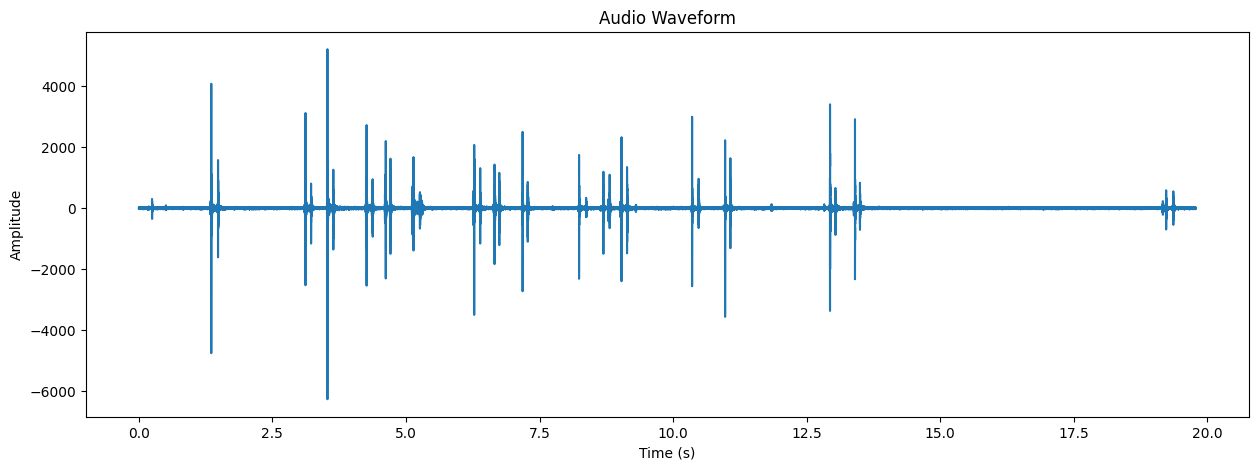

./recordings/passwords/password_attempt_3.wav


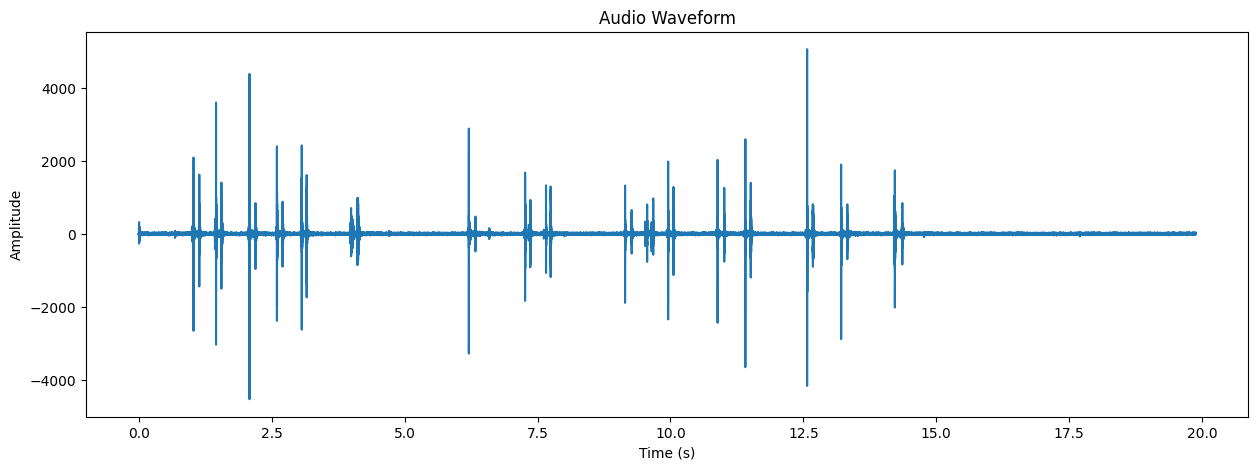

./recordings/passwords/password_attempt_2.wav


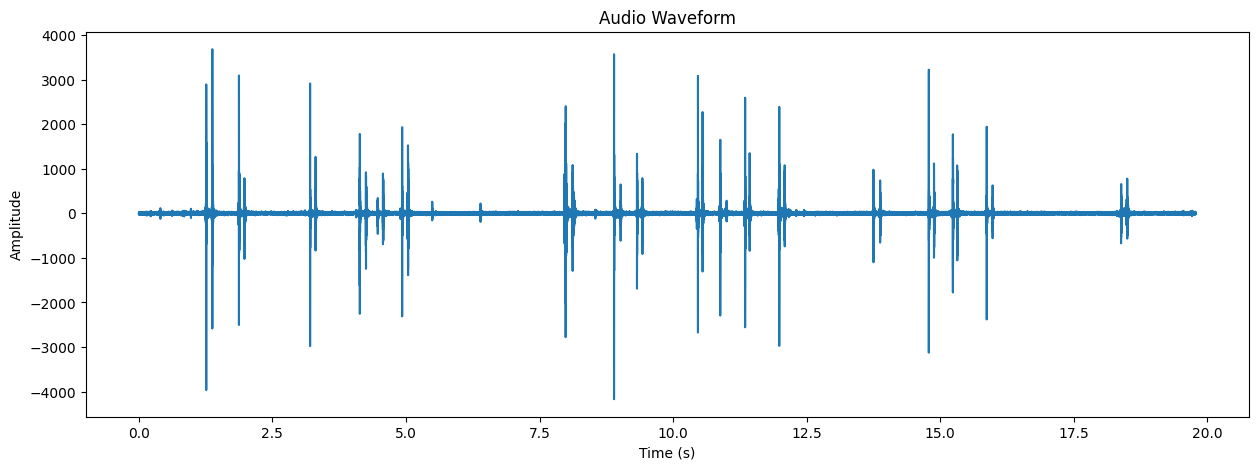

./recordings/passwords/password_attempt_5.wav


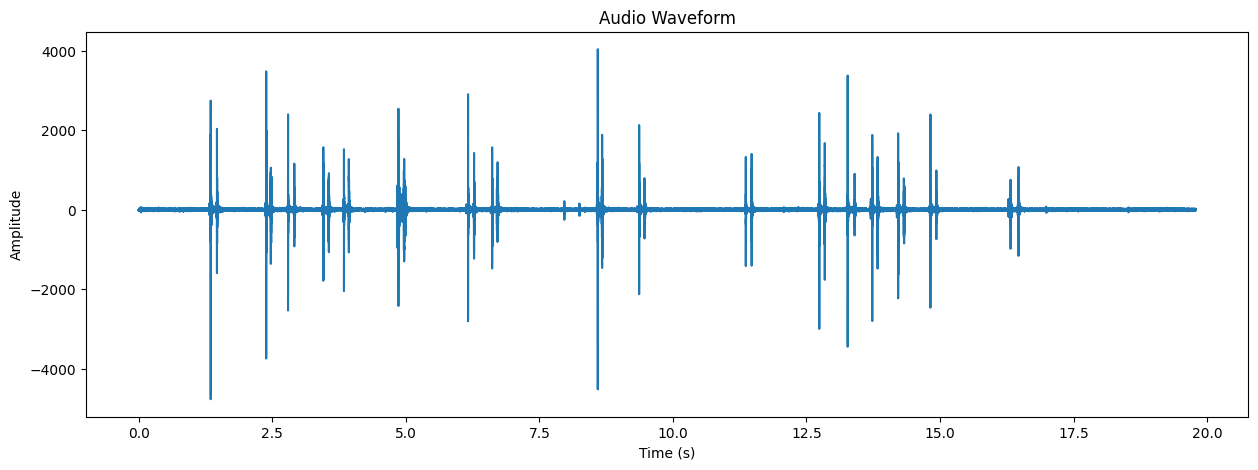

./recordings/passwords/password_attempt_4.wav


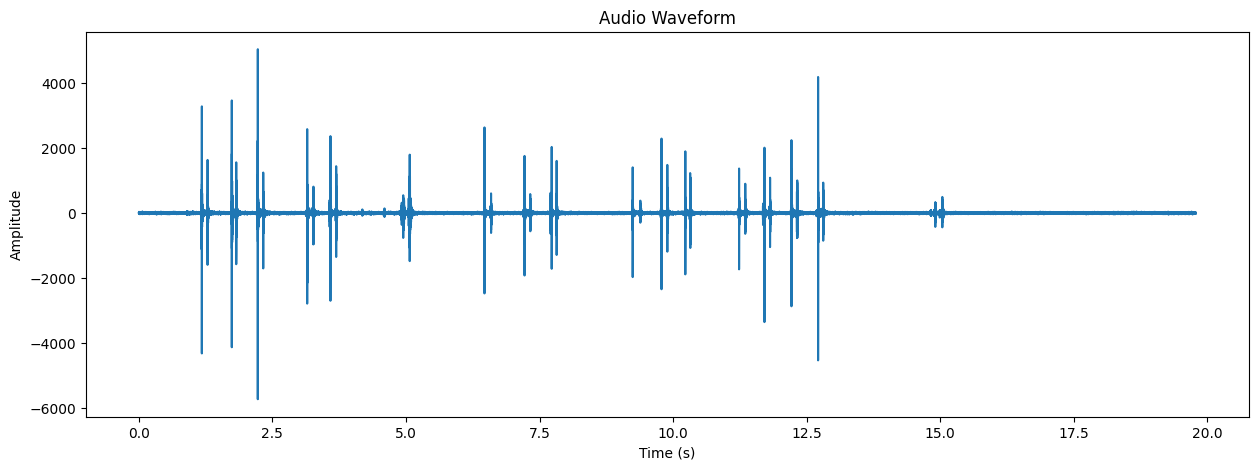

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import wave


def load_audio(file_path):
    """Load an audio file and return the audio data and frame rate."""
    with wave.open(file_path, "rb") as wf:
        frame_rate = wf.getframerate()
        n_frames = wf.getnframes()
        audio_data = wf.readframes(n_frames)
        audio_data = np.frombuffer(audio_data, dtype=np.int16)
    return audio_data, frame_rate


def plot_waveform(audio_data, frame_rate):
    """Plot the waveform of the audio data."""
    time_axis = np.linspace(0, len(audio_data) / frame_rate, num=len(audio_data))
    plt.figure(figsize=(15, 5))
    plt.plot(time_axis, audio_data)
    plt.title("Audio Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()


# Example usage
# audio_file = ARTIFACT_FILES[0]
for audio_file in ARTIFACT_FILES:
    audio_data, frame_rate = load_audio(audio_file)
    print(audio_file)
    plot_waveform(audio_data, frame_rate)